In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.patches as patches
import math
import time
%matplotlib inline

In [2]:
filepath = 'trajectories-0400-0415.csv'
data = pd.read_csv(filepath)

In [9]:
data_cut = data[['Vehicle_ID', 'Frame_ID', 'Local_X', 'Local_Y','Lane_ID', 'v_Length', 'v_Width', 'Angle']]
sorted_frame = data_cut.sort_values(by=['Frame_ID'])
sorted_np = sorted_frame.values
sorted_np = sorted_np[20000:50000,:]         # Omit data upto 100*1000ms = 100s
sorted_id = data_cut.values    # sort by vehicle id

# init array of sliced values, by frame number
sliced = []

# slice data by frame number
for i in range(int(min(sorted_np[:,1])),int(max(sorted_np[:,1]))):
    sliced.append(sorted_np[sorted_np[:,1]==i])


In [7]:
def updateVel(x,y,theta,vel):
    if (y < 40):
        theta = 5
    else:
        theta =  0
    vel = vel
    theta = theta
    return vel, theta

array([[1.00000000e+00, 1.20000000e+01, 1.68840000e+01, ...,
        1.43000000e+01, 6.40000000e+00, 2.47363964e+00],
       [1.00000000e+00, 1.30000000e+01, 1.69380000e+01, ...,
        1.43000000e+01, 6.40000000e+00, 2.42982837e+00],
       [1.00000000e+00, 1.40000000e+01, 1.69910000e+01, ...,
        1.43000000e+01, 6.40000000e+00, 2.47166476e+00],
       ...,
       [2.91100000e+03, 8.59000000e+03, 5.37460000e+01, ...,
        1.49000000e+01, 5.90000000e+00, 4.76689887e-01],
       [2.91100000e+03, 8.59100000e+03, 5.37720000e+01, ...,
        1.49000000e+01, 5.90000000e+00, 4.92501734e-01],
       [2.91100000e+03, 8.59200000e+03, 5.37990000e+01, ...,
        1.49000000e+01, 5.90000000e+00,            nan]])

C:\Users\dongwan123\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\patches.py:91: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


334.0


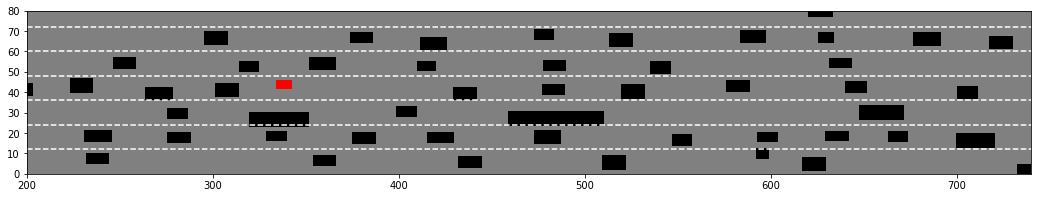

In [8]:
# set figure size
fig = plt.figure(figsize=(18,3))
#ax = fig.add_axes([0,0,1,1],frameon=False)
# ax = fig.add_subplot(2,1,2)

#add subplot
ax1 = fig.add_subplot(1,1,1)
count = 0
myvehicle_x_pos = 330
myvehicle_y_pos = 42
myvehicle_vel = 40
myvehicle_theta = 0
# Animation function

def animate(i):
    global count; global myvehicle_x_pos; global myvehicle_vel; global myvehicle_y_pos; global myvehicle_theta

    timestep = 0.1

    # update vehicle velocity and theta
    myvehicle_vel, myvehicle_theta = updateVel(myvehicle_x_pos, myvehicle_y_pos, myvehicle_theta, myvehicle_vel)
    myvehicle_x_pos = timestep * math.cos(math.radians(myvehicle_theta))*myvehicle_vel + myvehicle_x_pos
    myvehicle_y_pos = timestep * math.sin(math.radians(myvehicle_theta)) * myvehicle_vel + myvehicle_y_pos
    # Slice relevant information by frame number
    x = sliced[i][:,2]
    y = sliced[i][:,3]
    names = sliced[i][:,0]
    lane_label = sliced[i][:,4]
    vehicle_length = sliced[i][:,5]
    vehicle_width = sliced[i][:,6]

    # ax.clear()
    ax1.clear()
    plt.axhline(y=12, color='white', linestyle = '--')
    plt.axhline(y=24, color='white', linestyle = '--')
    plt.axhline(y=36, color='white', linestyle = '--')
    plt.axhline(y=48, color='white', linestyle = '--')
    plt.axhline(y=60, color='white', linestyle = '--')
    plt.axhline(y=72, color='white', linestyle = '--')
    #ax.imshow(img, extent = [-300,300,0,1500])
    # ax.set_autoscaley_on(False)
    # ax.set_autoscalex_on(False)
    # ax.set_xlim([200,330])
    # ax.set_ylim([0,100])
    # ax.scatter(y,x, s = 10)

    # set autoscale off, set x,y axis
    ax1.set_autoscaley_on(False)
    ax1.set_autoscalex_on(False)
    ax1.set_xlim([200,740])
    ax1.set_ylim([0,80])
    ax1.set_facecolor('gray')
    # ax1.scatter(y,x,s=10)
    patches = []
    patches1 = []
    lane_color = ["white", "red", "orange", "yellow", "green", "blue", "black", "pink"]
    # ax1.scatter(y,x, s = 50, marker = "s")

    # unzip by category, create rectangle for each car by frame
    for x_cent, y_cent, lane, vlength, vwidth in zip(x,y,lane_label,vehicle_length, vehicle_width):
        # print(x_cent, y_cent)
        vlen = vlength*0.75
        vwid = vwidth*0.75
        # colored vehicles
        # patches.append(ax1.add_patch(plt.Rectangle((y_cent-vlen/2, x_cent-vwid/2), vlen, vwid,
        #                 fill=True, angle=0, linewidth = 2, edgecolor = lane_color[int(lane)], color = lane_color[int(lane)])))

        patches.append(ax1.add_patch(plt.Rectangle((y_cent-vlen/2, x_cent-vwid/2), vlen, vwid,
                        fill=True, angle=0, linewidth = 2, edgecolor = lane_color[int(lane)], color = 'k')))

        #patches1.append(ax.add_patch(plt.Rectangle((y_cent, x_cent), 3, 2, fill=False, edgecolor="blue",label=lane_label)))
    # for i, txt in enumerate(names):
    #      ax1.annotate(int(txt), (int(y[i]),int(x[i])), fontsize=10)
    # if i%2==0:
    #     return patches
    # else:
    #     return patches1
    patches.append(ax1.add_patch(plt.Rectangle((myvehicle_x_pos,myvehicle_y_pos), 8, 4, fill=True,
                        angle = myvehicle_theta, color = 'red' )))
    count = count +1
    print(myvehicle_x_pos)
    time.sleep(0.5)
    return patches


# Animate at interval of 100ms
ani = animation.FuncAnimation(fig, animate, frames = range(2,30000), interval=100, blit=True)
#ani.save('video.mp4')


plt.show()
